(assign1_sol)=
# Assignment 1 solution -- brightness temperatures

Upload this notebook to canvas by 10am Monday Sept. 28

## Problem 1

In the cell below define a function that inverts the radiance (in MKS units) for the
brightness temperature in Kelvins.  Use the same format as the {ref}`sec:planck` notebook,
and use the %%file magic to output your function to a file called `planck_invert.py`

i.e. the top of the cell should look like:

```python
%%file planck_invert.py
def radiance_invert(wavelengths, Lstar):
   etc.
```

In [1]:
%%file planck_invert.py
import numpy as np


def radiance_invert(wavel, Lstar):
    """
    Calculate the brightness temperature
    
    Parameters
    ----------

      wavel: float
           wavelength (meters)

      Lstar: float or array
           Blackbody radiance (W/m^2/m/sr)
    Returns
    -------

    Tbright:  float or arr
           brightness temperature (K)
    """
    c, h, k = 299792458.0, 6.62607004e-34, 1.38064852e-23
    c1 = 2.0 * h * c ** 2.0
    c2 = h * c / k
    sigma = 2.0 * np.pi ** 5.0 * k ** 4.0 / (15 * h ** 3.0 * c ** 2.0)
    Tbright = c2 / (wavel * np.log(c1 / (wavel ** 5.0 * Lstar) + 1.0))
    return Tbright

def calc_radiance(wavel, Temp):
    """
    Calculate the blackbody radiance
    
    Parameters
    ----------

      wavel: float or array
           wavelength (meters)

      Temp: float
           temperature (K)

    Returns
    -------

    Llambda:  float or arr
           monochromatic radiance (W/m^2/m/sr)
    """
    c, h, k = 299792458.0, 6.62607004e-34, 1.38064852e-23
    c1 = 2.0 * h * c ** 2.0
    c2 = h * c / k
    sigma = 2.0 * np.pi ** 5.0 * k ** 4.0 / (15 * h ** 3.0 * c ** 2.0)
    Llambda_val = c1 / (wavel ** 5.0 * (np.exp(c2 / (wavel * Temp)) - 1))
    return Llambda_val

Overwriting planck_invert.py


## Problem 2

In the next cell import your `radiance_invert function` and use it to turn the calibrated
radiances you've written out in your `modis_data_analysis` notebook into brightness temperatures
in Kelvins.  Plot the temperatures as an image, using a colorbar as in Modis level1b notebook

In [2]:
from planck_invert import calc_radiance, radiance_invert
import h5py
import a301_lib


filenames = list((a301_lib.sat_data / "h5_dir").glob("ch30*2105*h5"))
print(filenames)
ch30file = filenames[0]
with h5py.File(ch30file,'r') as f:
    channel_group = f['channels']
    print(f"group keys: {list(channel_group.keys())}")
    ch30_data = channel_group['chan30'][...]

wavel = 9.73e-6  # wavelength in meters from Modis channel table
ch30_radiances = ch30_data * 1.0e6
# convert radiance to MKS
ch30_Tbright = radiance_invert(wavel, ch30_radiances)

******************************
context imported. Front of path:
/home/phil/work

[PosixPath('/home/phil/work/sat_data/h5_dir/ch30_MYD021KM.A2013222.2105.061.2018047235850.h5')]
group keys: ['chan30']


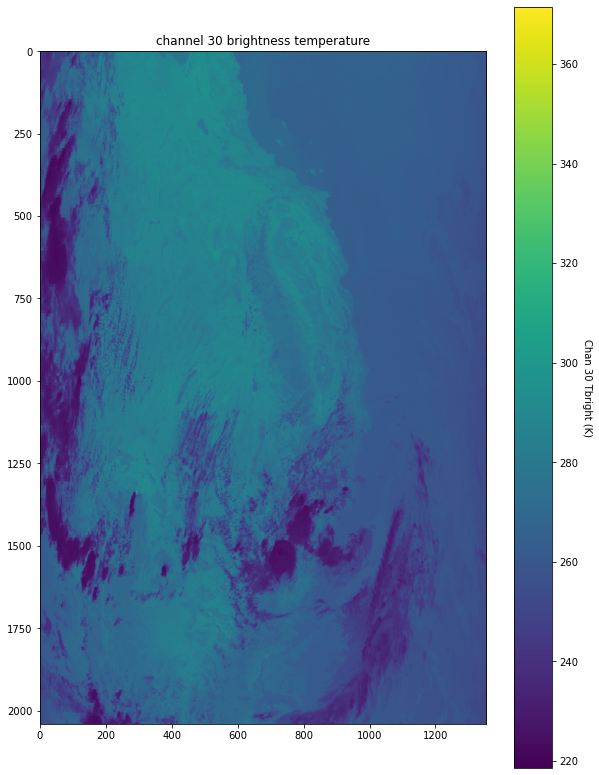

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 14))
CS = ax.imshow(ch30_Tbright)
cax = fig.colorbar(CS)
ax.set_title("channel 30 brightness temperature")
out = cax.ax.set_ylabel("Chan 30 Tbright (K)")
out.set_verticalalignment("bottom")
out.set_rotation(270)